In [1]:
#pip install tensorflow

In [2]:
import os
import numpy as np
import cv2
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
directory = "TImages/"

In [4]:
image_size = (244, 244)
classes = ["0", "1", "2"]

In [5]:
# Create an ImageDataGenerator instance with data augmentation settings
datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest',
    samplewise_center=True,
    samplewise_std_normalization=True,
)

In [6]:
training_data = []

def create_training_data():
    for category in classes:
        path = os.path.join(directory, category)
        class_num = classes.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img))
                new_array = cv2.resize(img_array, image_size)

                # Generate and store augmented images
                augmented_images = []
                augmented_images.append(new_array)  # Original image
                img_array_aug = new_array.reshape((1,) + new_array.shape)
                i = 0
                for batch in datagen.flow(img_array_aug, batch_size=1):
                    augmented_images.append(batch[0])
                    i += 1
                    if i >= 5:  # Generate 5 augmented images per input image
                        break

                for augmented_image in augmented_images:
                    image_hsv = cv2.cvtColor(augmented_image, cv2.COLOR_BGR2HSV)
                    training_data.append([image_hsv, class_num])

            except Exception as e:
                pass

In [7]:
create_training_data()

In [8]:
lenofimage = len(training_data)
print(lenofimage)

5850


In [9]:
X=[]
y=[]

for categories, label in training_data:
    X.append(categories)
    y.append(label)
X= np.array(X).reshape(lenofimage,-1)

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, )

In [12]:
## KNN MODEL

In [13]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [14]:
# Feature Scaling
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [15]:
# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11, 13 ,15]  # You can adjust this range
}

# Create the KNN model
knn = KNeighborsClassifier(n_neighbors = 5, weights='uniform', p = 2, algorithm='kd_tree') # metric = 'minkowski',
# {‘auto’, ‘ball_tree’, ‘kd_tree’, ‘brute’}

In [16]:
# Create the GridSearchCV object
grid_search = GridSearchCV(knn, param_grid, cv=5, verbose=2)

In [17]:
# Fit the GridSearchCV object to your data
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
[CV] END ......................................n_neighbors=3; total time=16.1min
[CV] END ......................................n_neighbors=3; total time=16.1min
[CV] END ......................................n_neighbors=3; total time=17.7min
[CV] END ......................................n_neighbors=3; total time=16.5min
[CV] END ......................................n_neighbors=3; total time=17.2min
[CV] END ......................................n_neighbors=5; total time=14.5min
[CV] END ......................................n_neighbors=5; total time=25.9min
[CV] END ......................................n_neighbors=5; total time=21.9min
[CV] END ......................................n_neighbors=5; total time=17.7min
[CV] END ......................................n_neighbors=5; total time=14.2min
[CV] END ......................................n_neighbors=7; total time=16.2min
[CV] END ......................................n_

GridSearchCV(cv=5, estimator=KNeighborsClassifier(algorithm='kd_tree'),
             param_grid={'n_neighbors': [3, 5, 7, 9, 11, 13, 15]}, verbose=2)

In [19]:
# Get the best estimator and evaluate it
best_knn = grid_search.best_estimator_
y_test_pred = best_knn.predict(X_test)
accuracy = accuracy_score(y_test, y_test_pred)
print("Best KNN Parameters:", grid_search.best_params_)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Best KNN Parameters: {'n_neighbors': 5}
Accuracy: 93.25%


In [20]:
df = pd.DataFrame(grid_search.cv_results_)
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,86.252593,19.333768,916.548771,54.910296,3,{'n_neighbors': 3},0.938034,0.940171,0.938034,0.940171,0.942308,0.939744,0.001599,2
1,92.178198,22.588952,1036.371244,249.164113,5,{'n_neighbors': 5},0.940171,0.938034,0.938034,0.942308,0.941239,0.939957,0.001709,1
2,89.164889,21.331041,1030.484996,246.425276,7,{'n_neighbors': 7},0.936966,0.939103,0.938034,0.939103,0.940171,0.938675,0.001090,3
3,92.041019,23.270247,931.149829,153.354624,9,{'n_neighbors': 9},0.936966,0.939103,0.936966,0.938034,0.939103,0.938034,0.000956,4
4,135.878013,67.561967,1884.306982,616.621931,11,{'n_neighbors': 11},0.935897,0.938034,0.939103,0.939103,0.938034,0.938034,0.001170,4
5,69.354206,28.615198,577.900399,56.185020,13,{'n_neighbors': 13},0.935897,0.938034,0.938034,0.938034,0.938034,0.937607,0.000855,6
6,68.088788,26.016277,700.235065,232.349579,15,{'n_neighbors': 15},0.935897,0.936966,0.935897,0.938034,0.938034,0.936966,0.000956,7


In [21]:
df[['param_n_neighbors', 'params', 'mean_test_score', 'rank_test_score']]

,param_n_neighbors,params,mean_test_score,rank_test_score
0,3,{'n_neighbors': 3},0.939744,2
1,5,{'n_neighbors': 5},0.939957,1
2,7,{'n_neighbors': 7},0.938675,3
3,9,{'n_neighbors': 9},0.938034,4
4,11,{'n_neighbors': 11},0.938034,4
5,13,{'n_neighbors': 13},0.937607,6
6,15,{'n_neighbors': 15},0.936966,7


In [22]:
grid_search.best_score_

0.939957264957265

In [23]:
grid_search.best_params_

{'n_neighbors': 5}

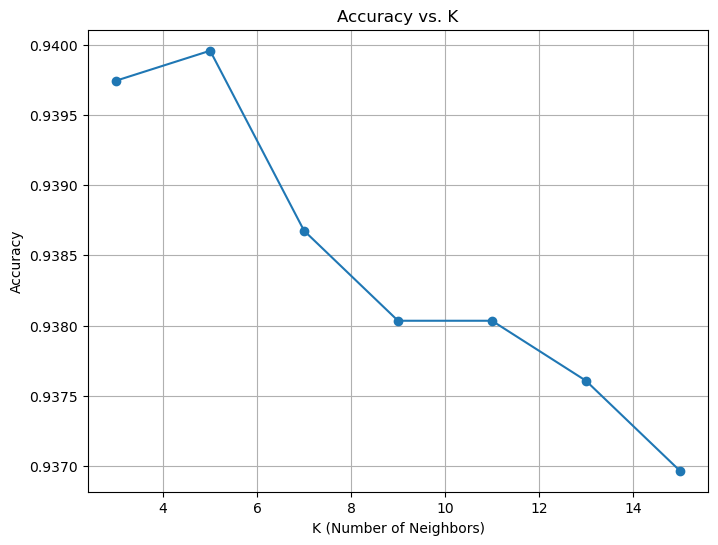

In [24]:
import matplotlib.pyplot as plt

k_values = [ 3, 5, 7, 9, 11, 13, 15]  # List of K values
accuracies = [ 0.939744, 0.939957, 0.938675, 0.938034, 0.938034, 0.937607, 0.936966]  # Corresponding accuracies

plt.figure(figsize=(8, 6))
plt.plot(k_values, accuracies, marker='o')
plt.xlabel('K (Number of Neighbors)')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. K')
plt.grid(True)
plt.show()

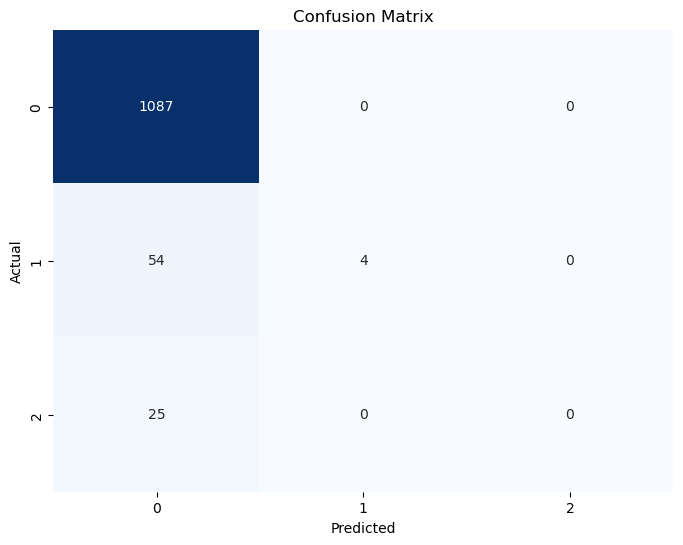

In [25]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_test_pred = grid_search.predict(X_test)
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_test_pred)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")

plt.show()

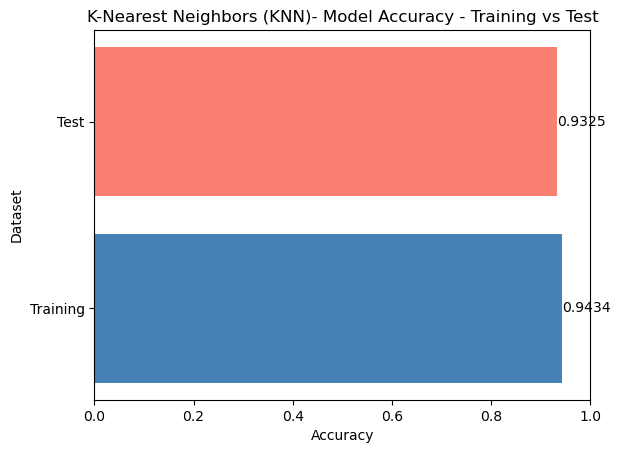

In [29]:
# Model accuracy
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
y_train_pred = grid_search.predict(X_train)
# Calculate accuracy scores
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

import numpy as np
import matplotlib.pyplot as plt

# Set the labels and accuracy scores
labels = ['Training', 'Test']
accuracy_scores = [train_accuracy, test_accuracy]
colors = ['steelblue', 'salmon']

# Plot the horizontal bar chart
plt.barh(labels, accuracy_scores, color=colors)

# Add text annotations for each bar
for i, score in enumerate(accuracy_scores):
    plt.text(score, i, f'{score:.4f}', va='center')

# Set the x-axis limits
plt.xlim([0, 1])

# Set the plot title and labels
plt.title('K-Nearest Neighbors (KNN)- Model Accuracy - Training vs Test')
plt.xlabel('Accuracy')
plt.ylabel('Dataset')

# Display the plot
plt.show()